## <strong>Sistema de 1ª ordem</strong>

A função de transferência de um **sistema de 1ª ordem** pode ser escrita da seguinte maneira:

$$G(s) = \frac{Ke^{-\tau_ds}}{{\tau}s + 1}$$

Sendo que: 
- K é o ganho
- $\tau_d$ é o atraso puro de tempo
- $\tau$ é a constante de tempo

Com os valores de $\tau$ e $\tau_d$ é possível estimar o **tempo de acomodação** para a **resposta ao degrau**, \
sendo ele:

$$T_s=(4\cdot\tau) +\tau_d $$

O objetivo aqui é interagir com um sistema de primeira ordem, no formato apresentado acima,\
e observar: a **resposta ao degrau**, o **plano s (com o polo do sistema)** e o **diagrama de Bode**. 

In [ ]:
# Importa bibliotecas
import sympy as sp
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.gridspec as gsp
import numpy as np
from ipywidgets import interact
sp.init_printing()
%matplotlib inline

Função de transferência (formato):


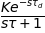


Sistema de referência:
K = 2.5
τ = 2.0
τd = 1.0

Sistema G(s):


interactive(children=(FloatSlider(value=2.05, description='K_in', max=4.0, min=0.1), FloatSlider(value=2.55000…

In [ ]:
t, K, tau, tau_d = sp.symbols('t, K, tau, tau_d',real=True, positive=True)
s = sp.Symbol('s')

def invL(F):
    return sp.inverse_laplace_transform(F, s, t)

U = 1/s
G = (K*sp.exp(-tau_d*s))/(tau*s + 1)
print('Função de transferência (formato):')
display(G)

resp_deg = invL(G*U)

modules = [{'Heaviside': lambda x: np.heaviside(x, 1)}, 'numpy']
val_deg = sp.lambdify((K, tau, tau_d, t), resp_deg, modules=modules)

ts = np.linspace(-1, 30, 1000)

u = 1*(ts>=0)

K_ref = 2.5
tau_ref = 2.0
tau_d_ref = 1.0

def primeira_ordem(K_in, tau_in, tau_d_in):

    plt.figure(figsize=(18,8.5))
    gs = gsp.GridSpec(3, 2)

    #Resposta ao degrau
    plt.subplot(gs[0,0])
    plt.plot(ts, val_deg(K_ref, tau_ref, tau_d_ref, ts), c='#808080', label='Sistema referência')
    plt.plot(ts, val_deg(K_in, tau_in, tau_d_in, ts), c='r', label='Sistema G(s)')
    plt.plot(ts, u, c = 'g', label='Degrau unitário')
    plt.title('Resposta ao degrau')
    plt.xlabel("$t$ (s)")
    plt.ylabel("Amplitude")
    plt.ylim(0, 5)
    plt.xlim(-0.1, 30)
    plt.legend()

    plt.axvline(x=(4*tau_in+tau_d_in), ymin=0, ymax=val_deg(K_in, tau_in, tau_d_in, (4*tau_in+tau_d_in))/5, c='k', lw=1, ls='--')
    plt.text((4*tau_in+tau_d_in)-1, -0.7, r'$T_s=%.1f$'%(4*tau_in+tau_d_in), fontdict={'color':'k','size': 10, 'backgroundcolor':'#ffaf7a'})

    plt.axvline(x=(tau_in+tau_d_in), ymin=0, ymax=val_deg(K_in, tau_in, tau_d_in, (tau_in+tau_d_in))/5, c='k', lw=1, ls='--')
    plt.text((tau_in+tau_d_in)-1, -0.7, r'$\tau + \tau_d=%.1f$'%(tau_in+tau_d_in), fontdict={'color':'k','size': 10, 'backgroundcolor':'#fbfb48'})

    #Plano s
    plt.subplot(gs[:,1])
    plt.axhline(y=0, c='k', lw=0.5)
    plt.axvline(x=0, c='k', lw=0.5)
    plt.plot(-1/tau_ref, 0, "x", mec='#808080', ms=15.0, label='Sistema referência')
    plt.plot(-1/tau_in, 0, "x", mec='r', ms=15.0, label='Sistema G(s)')
    plt.ylim(-5, 5)
    plt.xlim(-11, 1)
    plt.title('Plano s (polos "x" e zeros "o")')
    plt.xlabel("Real")
    plt.ylabel("Imaginário")
    plt.legend()

    #Diagrama de Bode
    omega = np.logspace(-2, 2, 4000)
    s = omega*1j

    G = (K_in*np.exp(-tau_d_in*s))/(tau_in*s + 1)
    G_ref = (K_ref*np.exp(-tau_d_ref*s))/(tau_ref*s + 1)

    #Módulo
    plt.subplot(gs[1,0])
    plt.semilogx(omega, 20*np.log10(np.abs(G_ref)), c='#808080', label='Sistema referência')
    plt.semilogx(omega, 20*np.log10(np.abs(G)), c='r', label='Sistema G(s)')
    plt.ylim(top=20)
    plt.xlim(10**-2, 10**2)
    plt.title('Diagrama de Bode (módulo)')
    plt.xlabel("$f$ (rad/s)")
    plt.ylabel("$|G(j\omega)| (dB)$")
    plt.grid(True, which="both")
    plt.legend()

    #Fase
    fase_g = np.unwrap(np.angle(G))*180/np.pi

    plt.subplot(gs[2,0])
    plt.semilogx(omega, np.unwrap(np.angle(G_ref))*180/np.pi, c='#808080', label='Sistema referência')
    plt.semilogx(omega, fase_g, c='r', label='Sistema G(s)')
    plt.ylim(min(fase_g)-20, -min(fase_g)/50)
    plt.xlim(10**-2, 10**2)
    plt.title('Diagrama de Bode (fase)')
    plt.xlabel("$f$ (rad/s)")
    plt.ylabel("$\measuredangle G(j\omega)$ (deg)")
    plt.grid(True, which="both")
    plt.legend()

    plt.subplots_adjust(hspace = 0.5)

print('\nSistema de referência:\nK = 2.5\n\u03C4 = 2.0\n\u03C4d = 1.0\n\nSistema G(s):');
interact(primeira_ordem, K_in=(0.1, 4.), tau_in=(0.1, 5.), tau_d_in=(0., 5.));
